<IPython.core.display.Javascript object>


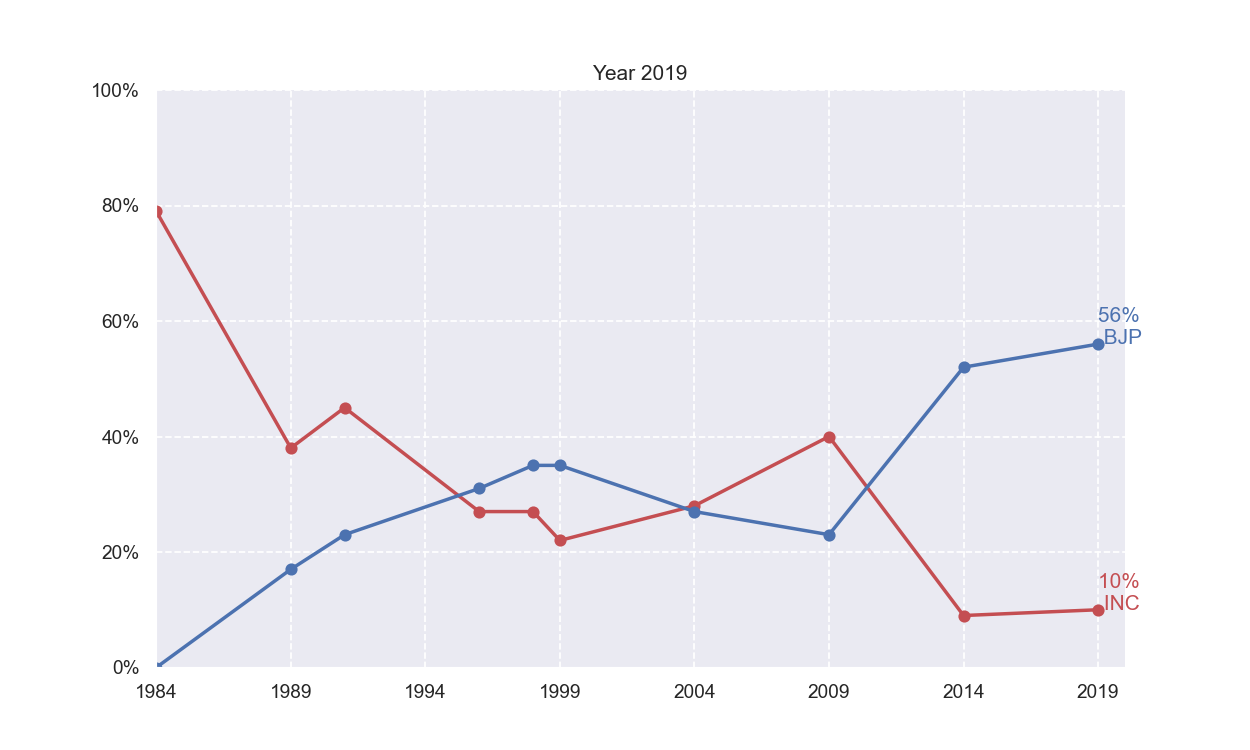

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import seaborn as sns
sns.set()
    

##############################################################

# Read data
data = pd.read_csv("indian_elections.dat")
# Re-arranging data
df1 = data['Year Perc_Seats\tParty'].str.split(n=1, expand=True)
df1.columns = ['Year', 'per_seat',]
df3 = df1['per_seat'].str.split(n=1, expand=True)
df3.columns = ['Per', 'Seat',]
new_data = df1.join(df3)
new_data.drop(["per_seat"],inplace=True,axis=1)
new_data['Year']=new_data['Year'].astype(int)
new_data['Per']=new_data['Per'].astype(float)
new_data['Seat']=new_data['Seat'].astype(str)
inc = new_data[new_data["Seat"]=="INC"]
bjp = new_data[new_data["Seat"]=="BJP"]
inc_1 = inc[['Year','Per']]

###############################################################

# Assigning column names to a variable 
title = 'Per'
title2 = 'Per'

###############################################################

# Generating data 
# Each for line 1
d2 = bjp
x2 = np.array((d2.iloc[:,:1].values).flatten())
y2 =np.array(d2['Per'])
data2 = np.array([x2, y2])

##############################################################

# Generating data 
# Each for line 2
d = inc_1
x = np.array((d.iloc[:,:1].values).flatten())
y = np.array(d['Per'])
data = np.array([x, y])

##############################################################

# Create new dataframe for the generated data
overdose = pd.DataFrame(y,x)
overdose2 = pd.DataFrame(y2,x2)

###############################################################

# Assign column names 
overdose.columns = {title}
overdose2.columns = {title2}

##############################################################

fig, ax = plt.subplots(figsize=(10,6))
# Set the y axis ticks to percent 
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.xlim(1984, 2020)
plt.xticks(list(range(1984,2020,5)))
plt.ylim(0,1)
z=ax.set_title("Year")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True,linestyle ='--')
ax.set_ylabel("")
# Create 2 list to get store element
# After every iteration
l, = ax.plot([], [],'r-o',lw=2)
p, = ax.plot([], [],'b-o',lw=2)
# Annotating the values on the plot
annotation_inc = ax.annotate('INC ', xy=(1,0), xytext=(-1,0),color='r')
annotation_bjp = ax.annotate('BJP ', xy=(1,0), xytext=(-1,0),color='b')




#############################################################

# Get the values of each generated data for the first one
new_val = []
for i in inc.Per:
    i = i*100
    new_val.append(i)
inc_new_val = [int(float(nums)) for nums in new_val]

# Get the values of each generated data for the second 
new_val2 = []
for j in bjp.Per:
    j = j*100
    new_val2.append(j)
bjp_new_val = [int(float(nums)) for nums in new_val2]



def animate(i, d, line1, d2, line2):
    line1.set_data(d[..., :i+1])
    line2.set_data(d2[..., :i+1])
    data_inc = overdose.iloc[:int(i+1)] 
    data2_bjp = overdose2.iloc[:int(i+1)]
    z.set_text("Year {:d}".format(data_inc.index[i]))
    annotation_inc.set_position((data_inc.index[i],data_inc.iloc[i]))
    annotation_inc.xy = (data_inc.index[i],data_inc.iloc[i])
    annotation_inc.set_text("%d%% \n INC" % inc_new_val[i])
    annotation_bjp.set_position((data2_bjp.index[i],data2_bjp.iloc[i]))
    annotation_bjp.xy = (data2_bjp.index[i],data2_bjp.iloc[i])
    annotation_bjp.set_text('%d%% \n BJP' % bjp_new_val[i])
    
    

        
##############################################################


annotation_inc = ax.annotate('INC ', xy=(1,0), xytext=(-1,0),color='r')
annotation_bjp = ax.annotate('BJP ', xy=(1,0), xytext=(-1,0),color='b')


# Set line_animation variable to call the
# Function recursively
line_animation = animation.FuncAnimation(
    fig,  animate,frames=11,fargs=(data, l, data2, p),interval=500)